#Resize the image


In [56]:
import cv2

# Load the input image
image_path = '/content/blue_component.jpg'
image = cv2.imread(image_path)

# Get the dimensions of the image
height, width, channels = image.shape
print("Image size (height x width):", height, "x", width)

# Print the number of color channels
print("Number of color channels:", channels)

Image size (height x width): 128 x 128
Number of color channels: 3


In [38]:
import cv2

# Load the input image
input_image_path = '/content/mb.jpg'
image = cv2.imread(input_image_path)

# Crop the image to 3200x3200 size
cropped_image = image[:128, :128]

# Save the cropped image as a JPG file
output_image_path = 'cropped_image.jpg'
cv2.imwrite(output_image_path, cropped_image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

print(f'Cropped image saved as {output_image_path}')


Cropped image saved as cropped_image.jpg


In [39]:
import cv2

# Load the input image
image_path = '/content/cropped_image.jpg'
image = cv2.imread(image_path)

# Get the dimensions of the image
height, width, channels = image.shape
print("Image size (height x width):", height, "x", width)

# Print the number of color channels
print("Number of color channels:", channels)


Image size (height x width): 128 x 128
Number of color channels: 3


#Dividing RGB colour components


In [40]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the input image
image_path = '/content/cropped_image.jpg'
image = cv2.imread(image_path)

# Separate the RGB components
red_component = image[:, :, 2]  # Red channel
green_component = image[:, :, 1]  # Green channel
blue_component = image[:, :, 0]  # Blue channel

# Get the dimensions of the image
height, width = image.shape[:2]

# Create an array of zeros with the same dimensions as the image
empty_channels = np.zeros((height, width), dtype=np.uint8)


# Replace the respective channels with the extracted components
red_image = cv2.merge([empty_channels, empty_channels, red_component])
green_image = cv2.merge([empty_channels, green_component, empty_channels])
blue_image = cv2.merge([blue_component, empty_channels, empty_channels])

# Save the components as color JPG files
cv2.imwrite('/content/red_component.jpg', red_image)
cv2.imwrite('/content/green_component.jpg', green_image)
cv2.imwrite('/content/blue_component.jpg', blue_image)

# Display the paths of saved files
print("Red component saved as: /content/red_component.jpg")
print("Green component saved as: /content/green_component.jpg")
print("Blue component saved as: /content/blue_component.jpg")


Red component saved as: /content/red_component.jpg
Green component saved as: /content/green_component.jpg
Blue component saved as: /content/blue_component.jpg


Displaying the seperated colour components

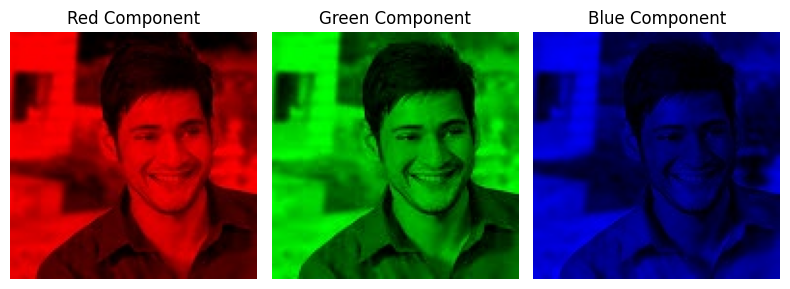

In [41]:
import cv2
import matplotlib.pyplot as plt

# Load the component images
red_image = cv2.imread('/content/red_component.jpg')
green_image = cv2.imread('/content/green_component.jpg')
blue_image = cv2.imread('/content/blue_component.jpg')

# Define the window size for displaying each image
window_size = (8, 6)  # Width x Height in inches

# Create a figure and axis with the specified window size
fig, axes = plt.subplots(1, 3, figsize=window_size)

# Display each component image on its corresponding axis
axes[0].imshow(cv2.cvtColor(red_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Red Component')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green Component')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Blue Component')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

#Dividing each colour component into 8*8 blocks.

In [42]:
import cv2

# Load the input image
image_path = '/content/cropped_image.jpg'
image = cv2.imread(image_path)

# Split the image into its RGB components
blue_component, green_component, red_component = cv2.split(image)

# Function to divide an image into blocks of size (block_size x block_size)
def divide_into_blocks(component):
    height, width = component.shape[:2]
    block_size = 8
    blocks = []
    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            block = component[y:y+block_size, x:x+block_size]
            blocks.append(block)
    return blocks

# Divide each component into blocks
blue_blocks = divide_into_blocks(blue_component)
green_blocks = divide_into_blocks(green_component)
red_blocks = divide_into_blocks(red_component)

# Display the number of blocks generated for each component
print("Number of blue blocks:", len(blue_blocks))
print("Number of green blocks:", len(green_blocks))
print("Number of red blocks:", len(red_blocks))


Number of blue blocks: 256
Number of green blocks: 256
Number of red blocks: 256


#Diffusion keys generation and Perform XOR operation

In [43]:
import numpy as np

def generate_diffusion_keys(N, block_size):
    # Step 1: Initialize Binary Vector
    V = np.zeros(8*N)

    # Step 2: Update Diffusion Parameter and Populate Binary Vector
    c_n = 0.2  # Initial value of c_n
    for i in range(2, 8*N + 1):
        c_n = 1 - 2 * (c_n**2)
        if c_n > 0:
            V[i-1] = 1

    # Step 3: Generate Pixel-based Key
    K = np.zeros(N)
    for i in range(1, N + 1):
        for j in range(1, 9):
            K[i-1] += V[(i-1)*8 + (j-1)] * (2 ** (j-1))

    # Arrange the pixel-based key as a 2D matrix based on the block size
    K_matrix = K.reshape((block_size, -1))

    return K_matrix

# Example usage
N = 64  # Number of pixels
block_size = 8  # Chosen block size
diffusion_keys = generate_diffusion_keys(N, block_size)
print("Diffusion keys (arranged as a 2D matrix):\n", diffusion_keys)


Diffusion keys (arranged as a 2D matrix):
 [[ 26.  58. 226. 227. 229. 111. 177. 211.]
 [157.  53.  96.  89. 150. 122. 243. 182.]
 [102.  56.  31. 175. 131.  90. 205.  20.]
 [244.  43.  44.  19. 164. 160.  10.  56.]
 [148. 230. 172. 133.  73. 143. 126. 157.]
 [ 38.  28.  33. 254. 201. 222. 234. 244.]
 [217. 146. 200.  86. 124. 219. 141. 134.]
 [ 82. 129.  17.   6. 191. 205. 212.  76.]]


Performing XOR operation on each block with generated Diffusion Key

In [44]:
import numpy as np

def apply_xor_to_blocks(blocks, diffusion_key):
    xor_blocks = []
    for block in blocks:
        # Ensure the diffusion key has the same data type as the block
        diffusion_key_casted = diffusion_key.astype(block.dtype)
        # Replicate diffusion key to match block dimensions
        diffusion_key_block = np.broadcast_to(diffusion_key_casted, block.shape)
        xor_block = np.bitwise_xor(block, diffusion_key_block)
        xor_blocks.append(xor_block)
    return xor_blocks

# Apply XOR operation for each color component
blue_xor_blocks = apply_xor_to_blocks(blue_blocks, diffusion_keys)
green_xor_blocks = apply_xor_to_blocks(green_blocks, diffusion_keys)
red_xor_blocks = apply_xor_to_blocks(red_blocks, diffusion_keys)

# Display the number of XOR blocks generated for each component
print("Number of blue XOR blocks:", len(blue_xor_blocks))
print("Number of green XOR blocks:", len(green_xor_blocks))
print("Number of red XOR blocks:", len(red_xor_blocks))

Number of blue XOR blocks: 256
Number of green XOR blocks: 256
Number of red XOR blocks: 256


#Functions for transforming position of blocks and transforming pixel values within the blocks.

##Blocks Transformation

In [45]:
def adjacent_exchange(matrices):
    """
    Perform Adjacent Exchange operation on the list of matrices.
    """
    result = []
    for i in range(0, len(matrices)-1, 2):
        result.append(matrices[i+1])
        result.append(matrices[i])
    return result

def reverse_exchange(matrices):
    """
    Perform Reverse Exchange operation on the list of matrices.
    """
    return matrices[::-1]

def middle_exchange(matrices):
    """
    Perform Middle Exchange operation on the list of matrices.
    """
    middle_index = len(matrices) // 2
    return matrices[middle_index:] + matrices[:middle_index]

##Row exchange of pixel values in each sub-block

In [46]:
import numpy as np

def multiple_row_adjacent_exchange(matrices):
    """
    Perform Row Adjacent Exchange operation on the list of matrices.
    """
    result = []
    for matrix in matrices:
        rows, cols = matrix.shape
        for i in range(0, rows - 1, 2):
            matrix[[i, i+1]] = matrix[[i+1, i]]  # Swap neighboring rows
        result.append(matrix)
    return result

def multiple_row_reverse_exchange(matrices):
    """
    Perform Row Reverse Exchange operation on the list of matrices.
    """
    result = []
    for matrix in matrices:
        result.append(np.flip(matrix, axis=1))  # Reverse each row
    return result

def multiple_row_middle_exchange(matrices):
    """
    Perform Row Middle Exchange operation on the list of matrices.
    """
    result = []
    for matrix in matrices:
        rows, cols = matrix.shape
        middle_row = rows // 2
        matrix[middle_row:] = matrix[middle_row:][::-1]  # Mirror rows around the middle row
        result.append(matrix)
    return result


##Column-Exchange of pixel values in each sub-block

In [47]:

def multiple_column_reverse_exchange(matrices):
    """
    Perform Column Adjacent Exchange operation on the list of matrices.
    """
    result = []
    for matrix in matrices:
        result.append(matrix[:, ::-1])  # Reverse the order of columns
    return result

def multiple_column_adjacent_exchange(matrices):
    """
    Exchange neighboring columns in each matrix of the list.
    """
    result = []
    for matrix in matrices:
        _, cols = matrix.shape
        for i in range(0, cols - 1, 2):
            matrix[:, [i, i+1]] = matrix[:, [i+1, i]]  # Swap neighboring columns
        result.append(matrix)
    return result


def multiple_column_middle_exchange(matrices):
    """
    Perform Column Middle Exchange operation on the list of matrices.
    """
    result = []
    for matrix in matrices:
        cols = matrix.shape[1]
        middle_col = cols // 2
        matrix[:, middle_col:] = matrix[:, middle_col:][:, ::-1]  # Mirror columns around the middle column
        result.append(matrix)
    return result


##Encryption

In [48]:
import random

# Define function names and corresponding labels
functions_mapping = {
    'adjacent_exchange': 'A',
    'reverse_exchange': 'B',
    'middle_exchange': 'C',
    'multiple_row_adjacent_exchange': 'D',
    'multiple_row_reverse_exchange': 'E',
    'multiple_row_middle_exchange': 'F',
    'multiple_column_adjacent_exchange': 'G',
    'multiple_column_reverse_exchange': 'H',
    'multiple_column_middle_exchange': 'I'
}

def generate_random_key():
    """
    Generate a random key with length 15 from the labeled characters (A to O) without repetition.
    """
    keys = random.sample(list(functions_mapping.values()), 9)
    return ''.join(keys)

def call_functions_with_key(matrices, key):
    """
    Call the 15 functions based on the given key.
    """
    result_matrices = matrices.copy()
    applied_operations = []

    for operation in functions_mapping.keys():
          result_matrices = globals()[operation](result_matrices)

    return result_matrices

# Generate a random key
Key = generate_random_key()
# print(type(Key))
# Key = "OLCHFIJBADKN"
# Call the apply_random_operations function
blue_result_matrices  = call_functions_with_key(blue_xor_blocks,Key)
green_result_matrices = call_functions_with_key(green_xor_blocks,Key)
red_result_matrices   = call_functions_with_key(red_xor_blocks,Key)

print("Applied Operations:", Key)
print("Length of blue matrices:",len(blue_result_matrices))
print("Length of green matrices:",len(green_result_matrices))
print("Length of red matrices:",len(red_result_matrices))


Applied Operations: DCIGHBEAF
Length of blue matrices: 256
Length of green matrices: 256
Length of red matrices: 256


##Combining and merging the each color component

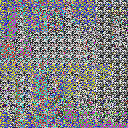

In [49]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Function to combine blocks into a single component
def combine_blocks(blocks):
    rows = int(np.sqrt(len(blocks)))
    cols = len(blocks) // rows
    block_size = blocks[0].shape[0]
    component = np.zeros((rows * block_size, cols * block_size), dtype=blocks[0].dtype)
    for i in range(rows):
        for j in range(cols):
            component[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = blocks[i*cols + j]
    return component

# Combine each color component blocks
combined_blue = combine_blocks(blue_result_matrices)
combined_green = combine_blocks(green_result_matrices)
combined_red = combine_blocks(red_result_matrices)

# Combine all color components to form the RGB image
reconstructed_image = cv2.merge((combined_blue, combined_green, combined_red))

# Display the reconstructed image
cv2_imshow(reconstructed_image)



#Decryption

In [50]:
Key1 = Key[::-1]
blue_result_matrices1  = call_functions_with_key(blue_result_matrices,Key1)
green_result_matrices1 = call_functions_with_key(green_result_matrices,Key1)
red_result_matrices1   = call_functions_with_key(red_result_matrices,Key1)

print("Applied Operations:", Key1)
print("Length of blue matrices:",len(blue_result_matrices1))
print("Length of green matrices:",len(green_result_matrices1))
print("Length of red matrices:",len(red_result_matrices1))

Applied Operations: FAEBHGICD
Length of blue matrices: 256
Length of green matrices: 256
Length of red matrices: 256


In [51]:
import numpy as np

def apply_xor_to_blocks1(blocks, diffusion_key):
    xor_blocks = []
    for block in blocks:
        # Ensure the diffusion key has the same data type as the block
        diffusion_key_casted = diffusion_key.astype(block.dtype)
        # Replicate diffusion key to match block dimensions
        diffusion_key_block = np.broadcast_to(diffusion_key_casted, block.shape)
        xor_block = np.bitwise_xor(block, diffusion_key_block)
        xor_blocks.append(xor_block)
    return xor_blocks

# Apply XOR operation for each color component
blue_xor_blocks_dec = apply_xor_to_blocks1(blue_result_matrices1, diffusion_keys)
green_xor_blocks_dec = apply_xor_to_blocks1(green_result_matrices1, diffusion_keys)
red_xor_blocks_dec = apply_xor_to_blocks1(red_result_matrices1, diffusion_keys)

# Display the number of XOR blocks generated for each component
print("Number of blue XOR blocks:", len(blue_xor_blocks_dec))
print("Number of green XOR blocks:", len(green_xor_blocks_dec))
print("Number of red XOR blocks:", len(red_xor_blocks_dec))


Number of blue XOR blocks: 256
Number of green XOR blocks: 256
Number of red XOR blocks: 256


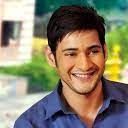

In [52]:
import cv2
import numpy as np

# Function to combine blocks into a single component
def combine_blocks(blocks):
    rows = int(np.sqrt(len(blocks)))
    cols = len(blocks) // rows
    block_size = blocks[0].shape[0]
    component = np.zeros((rows * block_size, cols * block_size), dtype=blocks[0].dtype)
    for i in range(rows):
        for j in range(cols):
            component[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = blocks[i*cols + j]
    return component

# Combine each color component blocks
combined_blue_dec = combine_blocks(blue_xor_blocks_dec)
combined_green_dec = combine_blocks(green_xor_blocks_dec)
combined_red_dec = combine_blocks(red_xor_blocks_dec)

# Combine all color components to form the RGB image
reconstructed_image_dec = cv2.merge((combined_blue_dec, combined_green_dec, combined_red_dec))

# Display the reconstructed image
cv2_imshow(reconstructed_image_dec)



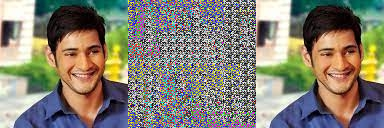

Original Image Encrypted Image(KEY=DCIGHBEAF)  Decrypted Image


In [55]:
import numpy as np
from google.colab.patches import cv2_imshow

# Create three sample color images (3 channels: RGB)
image1 = image
image2 = reconstructed_image
image3 = reconstructed_image_dec


# Create titles for each image
title1 = "Original Image"
title2 = f"Encrypted Image(KEY={Key})"
title3 = "Decrypted Image"

# Concatenate images horizontally
concatenated_image = np.concatenate((image1, image2, image3), axis=1)

# Display concatenated image with titles
cv2_imshow(concatenated_image)
print(title1 + " " * 30 + title2 + " " * 20 + title3)

